## Identify Good Loan Customers

<p> _The goal of this project is to identify customers who can be good customers to the bank by figuring out which customers are less likely to  default on the loans and to figure out what is the necessary information that should be gathered from the customers. The data used in this project is obtained from thedevmasters Mastering Applied Data Science coursework._ </p>

<p> _The objective would help with the revenue metric as identifying good customers would increase revenue and also help with the risk metric._ </p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# upload data in pandas
init_data = pd.read_csv('LoansTrainingSet.csv')
init_data.head()

C:\Users\apanc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [4]:
# Look at basic information of the data
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

<p> The dataset has 19 columns out of which 9 are object type. We might have to change these into numerical before feeding it into an algorithm. Also we notice that 'Credit Score', 'Annual Income', 'Months since last delinquent', 'Bankruptcies', and 'Tax Liens' have missing values. These need to be looked at in further details to see if we should fill those values or not include it in the algorithms.</p>

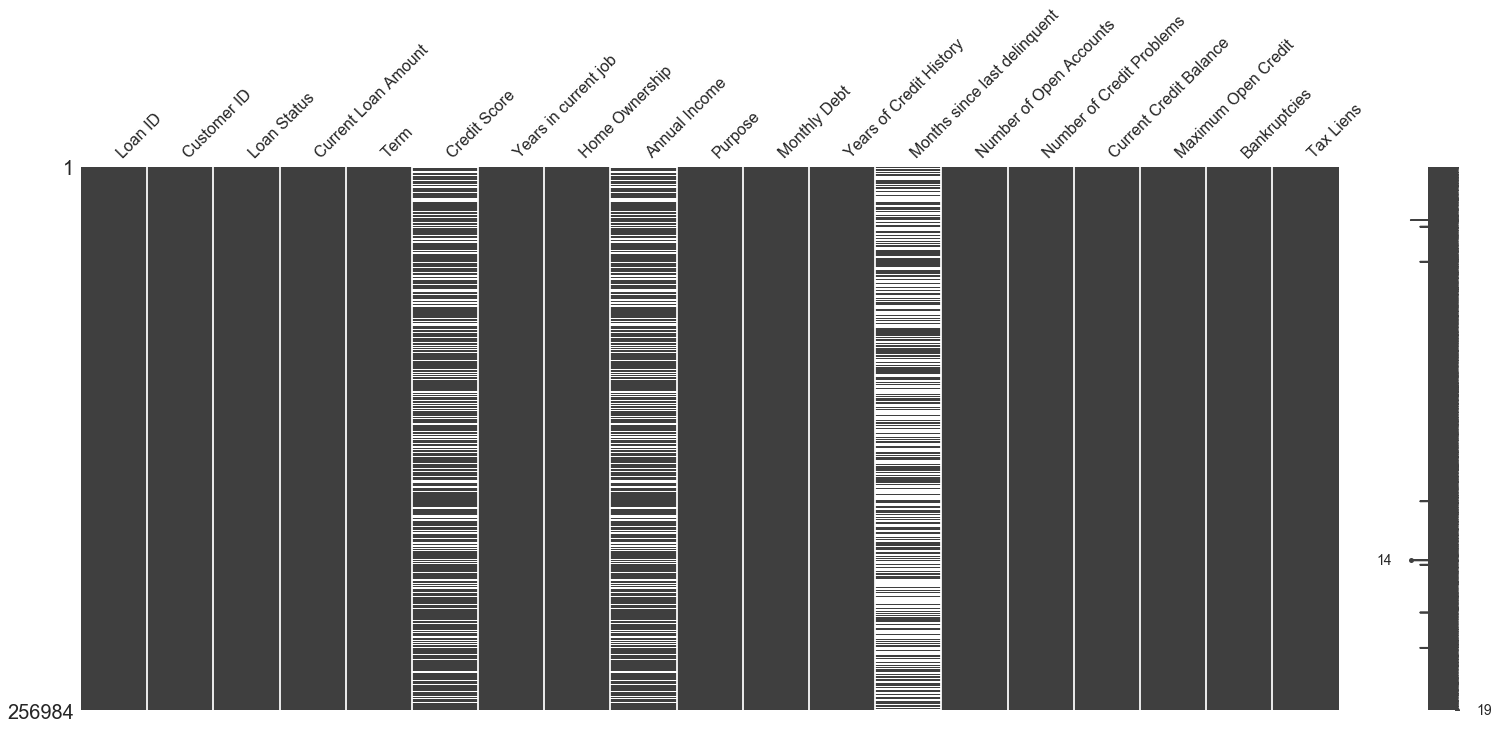

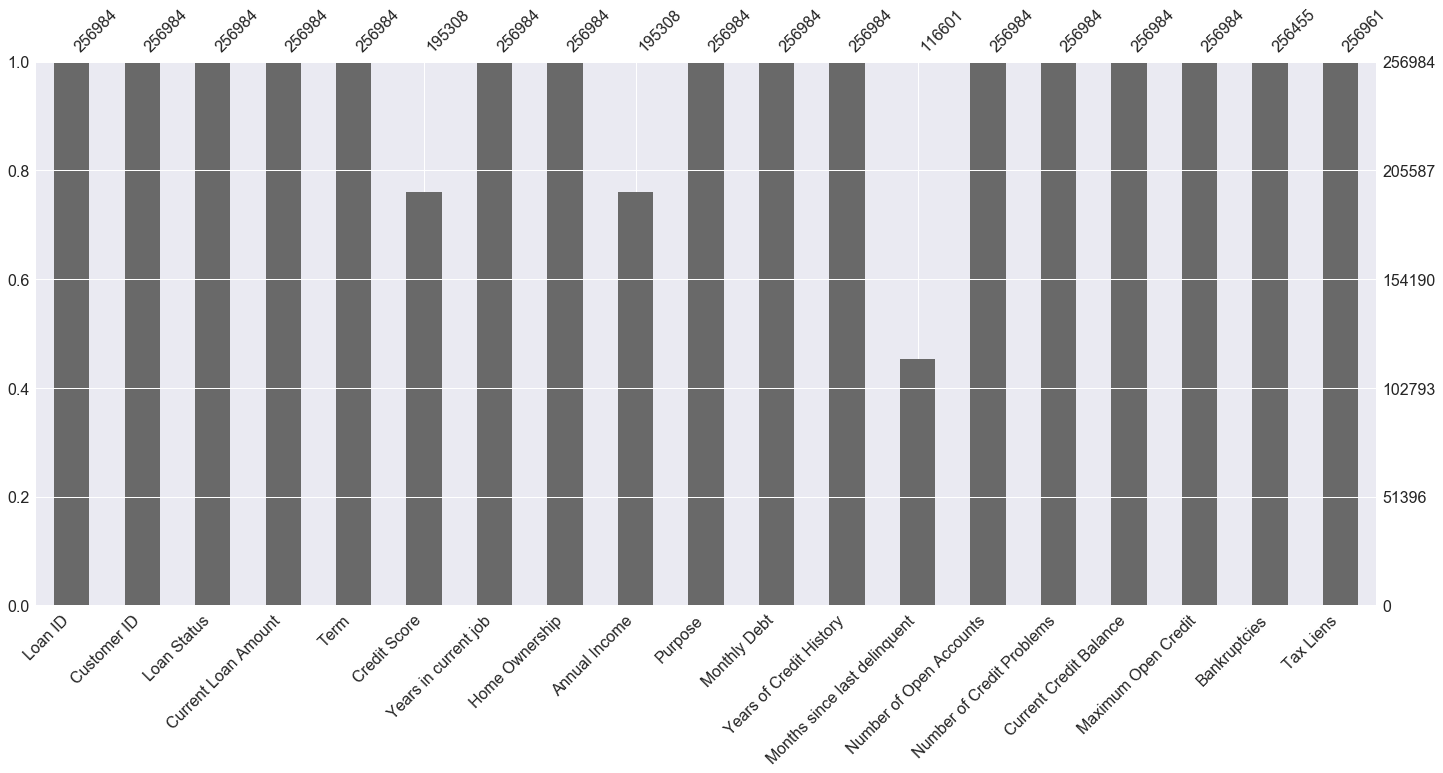

In [5]:
# Look at the missing information in the datab
msno.matrix(init_data)
msno.bar(init_data)

<p> **There are three columns that have a lot of missing values. The column with the most missing value is Months since last delinquent, followed by Credit Score and then Annual Income.**</p>
Questions to ask:

1. What does NaN in Months since last delinquent mean? Does it mean that they did not have any delinquency or does it mean that this information was not collected?
2. What does missing information in Credit Score mean? Was it never calculated or was it not inputted in the data set?
3. What does missing information in Annual Income mean? Was it not gathered when information was being collected? 


<p> The following are the initial steps that will be taken to reach the objective of this project. However, certain steps might change as we gather more information. </p>

<p> Let's look at the general statistics to get a better understanding of the columns. </p>

In [6]:
init_data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


1. **Current Loan Amount:** This column has some extreme values that seem to be driving the mean, and std. dev. really high. 75% of the values are in tens of thousands.
2. **Credit Score:** This column should be in the range of 0 to 800. However, the highest score is 7510. The mean and std. dev. are high which suggests that there are some values higher than 800 which needs to be fixed.
3. **Annual Income:** Some values are in millions. But this can be expected.
4. **Years of Credit History:** There are some high values but it is possible to have someone with 70.5 years of credit history.
5. **Months since last delinquent:** There are some high values but that would be expected.
6. **Number of Open Accounts:** There are some values which seem higher than normal. There is someone who has 76 open credit card accounts. While this is not impossible but it is something to look into.
7. **Number of credit Problems:** While majority of values seem to be 0, there are a few with Credit Problems.
8. **Current Credit Balance:** While majority of the people have a balance in tens of thousands, there are some people with a credit card balance of over a million. While this can happen, it needs to be checked.
9. **Bankrupties:** Majority of the people do not have any bankruptcy. There is someone who has 7 bankruptcy. It is good to look into people with high bankruptcy.
10. **Tax Liens:** Majority of the people do not have tax liens but there are some who have tax liens.

<p> Let us begin by looking at any possible duplicate rows in the data set.</p>

In [7]:
init_data[init_data.duplicated(keep=False)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
13,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
14,00029f9f-0cc5-4d4e-aabc-ea4a7fe74e12,afbc2fa3-3bad-4d48-b691-829aed78bad5,Charged Off,17961,Short Term,701.0,< 1 year,Own Home,53053.0,Debt Consolidation,$596.85,9.9,43.0,7,0,6810,22775,0.0,0.0
18,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
19,00035328-2636-4390-8322-5841de482d2b,28eb75ac-6a09-4057-b73f-726c72ebf933,Charged Off,11604,Short Term,729.0,6 years,Home Mortgage,35315.0,Debt Consolidation,$662.16,15.0,NaN,12,0,17092,20743,0.0,0.0
31,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,Charged Off,14727,Short Term,740.0,3 years,Home Mortgage,70690.0,Debt Consolidation,"$1,083.91",18.0,27.0,12,0,43375,225911,0.0,0.0
32,0006572c-9567-484d-b49b-bfe06536aa96,c1a7ba66-9f36-4f5c-86cd-1aa7ad68b954,Charged Off,14727,Short Term,740.0,3 years,Home Mortgage,70690.0,Debt Consolidation,"$1,083.91",18.0,27.0,12,0,43375,225911,0.0,0.0
36,000795b0-d767-42bf-837a-80d5b78c1e50,b533c78c-3096-4914-acb1-5453c0ff76a4,Charged Off,19731,Long Term,623.0,3 years,Rent,43846.0,Buy House,$738.08,16.2,55.0,13,1,9031,17955,1.0,0.0
37,000795b0-d767-42bf-837a-80d5b78c1e50,b533c78c-3096-4914-acb1-5453c0ff76a4,Charged Off,19731,Long Term,623.0,3 years,Rent,43846.0,Buy House,$738.08,16.2,55.0,13,1,9031,17955,1.0,0.0
39,0008a65c-3054-4b5d-931d-8352021f813d,04513d99-d809-4eb6-b4bb-6abc767d861e,Charged Off,7066,Short Term,741.0,10+ years,Own Home,60564.0,Debt Consolidation,$706.58,14.6,56.0,4,0,6229,9242,0.0,0.0
40,0008a65c-3054-4b5d-931d-8352021f813d,04513d99-d809-4eb6-b4bb-6abc767d861e,Charged Off,7066,Short Term,741.0,10+ years,Own Home,60564.0,Debt Consolidation,$706.58,14.6,56.0,4,0,6229,9242,0.0,0.0


There are a lot of duplicates in the data set. We can remove the duplicates and just keep the first occuring value to ensure that there aren't any duplicate values.

In [8]:
# Make a new dataframe without duplicates. I could have used init_data.drop_duplicates(inplace=True) but wanted to try another
# way
new_init=init_data[~init_data.duplicated()].reset_index()

In [9]:
new_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240374 entries, 0 to 240373
Data columns (total 20 columns):
index                           240374 non-null int64
Loan ID                         240374 non-null object
Customer ID                     240374 non-null object
Loan Status                     240374 non-null object
Current Loan Amount             240374 non-null int64
Term                            240374 non-null object
Credit Score                    181028 non-null float64
Years in current job            240374 non-null object
Home Ownership                  240374 non-null object
Annual Income                   181028 non-null float64
Purpose                         240374 non-null object
Monthly Debt                    240374 non-null object
Years of Credit History         240374 non-null float64
Months since last delinquent    108947 non-null float64
Number of Open Accounts         240374 non-null int64
Number of Credit Problems       240374 non-null int64
Current C

In [10]:
new_init.drop('index', axis=1, inplace=True)

In [11]:
new_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240374 entries, 0 to 240373
Data columns (total 19 columns):
Loan ID                         240374 non-null object
Customer ID                     240374 non-null object
Loan Status                     240374 non-null object
Current Loan Amount             240374 non-null int64
Term                            240374 non-null object
Credit Score                    181028 non-null float64
Years in current job            240374 non-null object
Home Ownership                  240374 non-null object
Annual Income                   181028 non-null float64
Purpose                         240374 non-null object
Monthly Debt                    240374 non-null object
Years of Credit History         240374 non-null float64
Months since last delinquent    108947 non-null float64
Number of Open Accounts         240374 non-null int64
Number of Credit Problems       240374 non-null int64
Current Credit Balance          240374 non-null int64
Maximum O

In [12]:
# Let us confirm that there are no duplicate values in the data set
new_init.duplicated().sum()

0

<p> Let us look at the 'Loan Status' column to see what type of values it has and the overall percentage.</p>

In [13]:
new_init['Loan Status'].value_counts()/len(new_init) * 100

Fully Paid     73.298693
Charged Off    26.701307
Name: Loan Status, dtype: float64

<p>The 'Loan Status' column has two values "Fully Paid" and "Charged Off". These can be converted into categories. It can also be seen that the data set we have is an imbalanced one since there are a lot more of "Fully Paid" class. We might have to do some sampling technique to ensure that the training set is more balanced. We will explore a few options to see what we can do.</p>

In [14]:
# We can use mapping to convert the short term values to 0 and long term values to 1
loan_values = {'Fully Paid': 0, 'Charged Off': 1}
new_init['Loan Status'] = new_init['Loan Status'].map(loan_values)

<p> Let's see if the conversion actually took place.</p>

In [15]:
new_init['Loan Status'].value_counts()/len(new_init) * 100

0    73.298693
1    26.701307
Name: Loan Status, dtype: float64

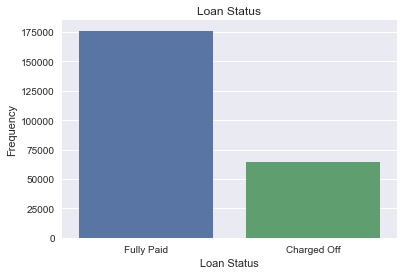

In [16]:
# Let us look at the countplot to get a sense of 'Loan Status'
ax = sns.countplot(data=new_init, x='Loan Status')
ax.set_xticklabels(['Fully Paid', 'Charged Off'])
plt.title('Loan Status')
plt.ylabel('Frequency')

<p> It would be best to seperate the dataset into train data and test data. Creating a test data will help us evaluate how well our model performs on the unseen data. Let us keep 20% out as test data and keep 80% for training data. Since we are dealing with an imbalanced dataset, let us try to keep the same ratio of "Fully Paid" and "Charged Off" customers in the test data (this is what we would encounter when the model goes live). For training data we can try two approaches: </p>

1. We can keep the same imbalance and train the data to see how they perform on the validation data set.
2. We can make the ratio of "Fully Paid" and "Charged Off" close to 1:1 and then train the model and see how they perform          on the validation data set. 


<p>We can then make a comparison to see if there is any difference and then use the best model to see how they perform on the test data set.</p>

<p> Let us start with the first approach and divide the train and test data set with the same ratio. We will use StratifiedShuffleSplit from sklearn.model_selection to achieve this goal.</p>

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(new_init, new_init['Loan Status']):
    strat_train_set = new_init.loc[train_index]
    strat_test_set = new_init.loc[test_index]

<p> Let us look at the percentage of "Fully paid" and "Charged Off" in the test data and train data </p>

In [18]:
strat_test_set['Loan Status'].value_counts()/len(strat_test_set)*100

0    73.297972
1    26.702028
Name: Loan Status, dtype: float64

In [19]:
strat_train_set['Loan Status'].value_counts()/len(strat_train_set) * 100

0    73.298873
1    26.701127
Name: Loan Status, dtype: float64

<p> We can see that the ratio is maintained in both the train and test data sets. Let's proceed to clean the training data set. We would do manual cleaning to begin with and slowly we can build a data cleaning pipeline which we can use to clean the test data set. This data pipeline can be further used when the model goes live and new data is encountered.</p>
<p> Let's look at the training data set.</p>

In [20]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192299 entries, 107786 to 156161
Data columns (total 19 columns):
Loan ID                         192299 non-null object
Customer ID                     192299 non-null object
Loan Status                     192299 non-null int64
Current Loan Amount             192299 non-null int64
Term                            192299 non-null object
Credit Score                    144694 non-null float64
Years in current job            192299 non-null object
Home Ownership                  192299 non-null object
Annual Income                   144694 non-null float64
Purpose                         192299 non-null object
Monthly Debt                    192299 non-null object
Years of Credit History         192299 non-null float64
Months since last delinquent    87490 non-null float64
Number of Open Accounts         192299 non-null int64
Number of Credit Problems       192299 non-null int64
Current Credit Balance          192299 non-null int64
Maximu

<p> 'Loan ID' and 'Customer ID' are probably not needed to build a model. However we might be able to do feature engineering by using the 'Customer ID' to see if they had gotten a loan from the bank previously and how was it "Fully Paid" or not. But for the time being let us build a model without any feature engineering. Let us look at all the object data (besides the 'Loan ID' and 'Customer ID') first and deal with them individually.</p>

In [21]:
strat_train_set.select_dtypes(include=['object'])

,Loan ID,Customer ID,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
107786,7298705f-7dcc-4830-890a-2ed5b8fd85a5,d06a00a8-9a12-4a9a-93f8-2cbcecb7aebf,Long Term,10+ years,Home Mortgage,Debt Consolidation,"$1,076.07",37627
55344,3ae3badf-cea3-4148-ae90-fda164086c80,e008378b-9d70-4de2-b9fc-b13e5cb4cbf2,Short Term,1 year,Rent,Debt Consolidation,$601.12,16326
112379,778594cf-dea0-4fbd-ab1e-1e2eaea148bf,72c7e0c5-d3fa-4958-a6eb-28b7487cdde4,Long Term,n/a,Home Mortgage,Debt Consolidation,"$1,197.81",80299
143909,99274aa3-9ba5-4e93-abd3-4eede79ece8c,b0a5a3ef-77c9-4186-a59b-b58d0376e0b0,Short Term,4 years,Home Mortgage,Debt Consolidation,$857.65,55227
6703,072fb59a-18ef-412f-87e0-a6b8a290ec2d,28fbf12a-73e4-41a7-965a-04ca60a15351,Short Term,n/a,Own Home,other,$477.50,286329
71865,4c4e2e14-212b-44c3-a82a-50f25df90de8,ea1f8c54-bc30-43e6-af4e-236083cba701,Short Term,2 years,Home Mortgage,Debt Consolidation,"$1,556.80",11368
102955,6d5e304d-8f53-4637-8f26-4713e09ab51b,cdd9ce86-3a0f-411c-b71c-27c033cb2e57,Short Term,n/a,Own Home,other,$479.39,82040
23194,18c940ec-565a-42d0-a9f4-6fcb00ec2373,c01ccf72-c906-4984-94ba-478c51178b3c,Short Term,10+ years,Home Mortgage,Debt Consolidation,"$1,198.07",43889
41226,2bd3f40c-80f4-42a2-b0e3-ad45c594d7ac,0244e803-2a84-4a5e-b93f-78c1bfb10d19,Short Term,10+ years,Home Mortgage,Debt Consolidation,"$2,876.32",29662
14381,0f519dbc-bf3b-46ac-b7ae-c70032053fa8,6fb303d6-b65d-4061-81af-a2279b9cc56c,Short Term,2 years,Rent,Debt Consolidation,$690.33,7939


<p> From the above list we can see that some of the object types are actually numerical or categorical type. They need to be changed. Let us look at each of them individually to determine what steps we should take to make the changes.</p>

<p> Let us look at the column 'Term' to see what types of values it contains.</p>

In [22]:
strat_train_set['Term'].value_counts()

Short Term    145804
Long Term      46495
Name: Term, dtype: int64

<p> The 'Term' column only has two values "Short Term" and "Long Term". These can be converted into categories.</p>

In [23]:
# We can use mapping to convert the short term values to 0 and long term values to 1
values = {'Short Term': 0, 'Long Term': 1}
strat_train_set['Term'] = strat_train_set['Term'].map(values)

In [24]:
strat_train_set['Term'].value_counts()

0    145804
1     46495
Name: Term, dtype: int64

<p> We have successfully converted the object column 'Term' into a categorical value. Our training data has a lot of people with short term loans than long term loans. Let's look at how the 'term' relates to 'loan status'.</p>

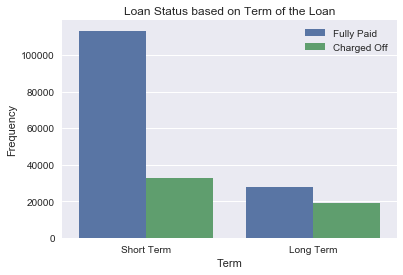

In [27]:
ax = sns.countplot(data=strat_train_set, x='Term', hue='Loan Status')
ax.set_xticklabels(['Short Term', 'Long Term'])
plt.title('Loan Status based on Term of the Loan')
plt.legend(['Fully Paid', 'Charged Off'])
plt.ylabel('Frequency')

<p> It seems that people tend to have higher charged off rate when they have a long term loan compared to the short term loans. It would seem that 'Term' might be an important feature in finding out the loan status. </p>

<p> We can look at 'Home Ownership' column to see what type of values it has.</p>

In [28]:
strat_train_set['Home Ownership'].value_counts()

Home Mortgage    93776
Rent             81013
Own Home         17073
HaveMortgage       437
Name: Home Ownership, dtype: int64

<p> The 'Home Ownership' column is supposed to have three values but it seems that 437 values are misentered. These need to be fixed. We can use map in order to fix the issue.<p>

In [29]:
ho_values = {'Home Mortgage': 'Home Mortgage', 'HaveMortgage': 'Home Mortgage', 'Rent': 'Rent', 'Own Home': 'Own Home'}
strat_train_set['Home Ownership'] = strat_train_set['Home Ownership'].map(ho_values)
strat_train_set['Home Ownership'].value_counts()

Home Mortgage    94213
Rent             81013
Own Home         17073
Name: Home Ownership, dtype: int64

<p> The 'Home Ownership' column values are fixed. Let us look at the relationship between 'Home Ownership' and 'Loan Status'.</p>

In [30]:
strat_train_set.groupby(['Home Ownership', 'Loan Status'])['Loan ID'].count()

Home Ownership  Loan Status
Home Mortgage   0              71744
                1              22469
Own Home        0              12345
                1               4728
Rent            0              56864
                1              24149
Name: Loan ID, dtype: int64

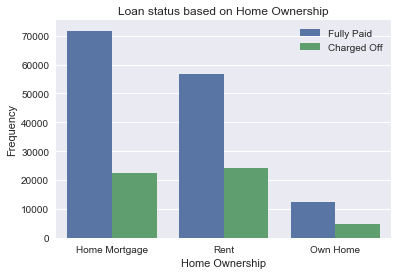

In [32]:
ax = sns.countplot(data=strat_train_set, x='Home Ownership', hue='Loan Status')
plt.legend(['Fully Paid', 'Charged Off'])
plt.title('Loan status based on Home Ownership')
plt.ylabel('Frequency')

<p> From the countplot it can be seen tht people who Rent have a higher chance of defaulting on a loan followed by people who Own Home. People who have Home Mortgage tend to have lower charged off accounts.</p>

<p> Let us look at 'Monthly debt'. It is a object data type probably because of the \$ sign associated with each value. Let us take out the \$ sign to make it a numerical data type.</p>

In [33]:
strat_train_set['Monthly Debt'].values.tolist()

['$1,076.07 ',
 '$601.12',
 '$1,197.81 ',
 '$857.65',
 '$477.50',
 '$1,556.80 ',
 '$479.39',
 '$1,198.07 ',
 '$2,876.32 ',
 '$690.33',
 '$1,953.07 ',
 '$2,329.15 ',
 '$1,016.50 ',
 '$450.62',
 '$977.25',
 '$2,494.05 ',
 '$807.44',
 '$483.04',
 '$1,200.66 ',
 '$764.52',
 '$836.22',
 '$1,923.21 ',
 '$1,014.68 ',
 '$2,858.51 ',
 '$248.32',
 '$727.03',
 '$709.57',
 '$1,005.70 ',
 '$204.43',
 '$1,137.25 ',
 '$1,841.47 ',
 '$1,864.18 ',
 '$575.37',
 '$639.94',
 '$1,818.26 ',
 '$2,568.25 ',
 '$553.02',
 '$1,234.85 ',
 '$321.85',
 '$370.54',
 '$479.58',
 '$55.71',
 '$3,629.08 ',
 '$868.24',
 '$820.84',
 '$627.89',
 '$341.03',
 '$1,690.67 ',
 '$1,982.57 ',
 '$383.46',
 '$2,777.34 ',
 '$1,273.38 ',
 '$1,027.77 ',
 '$1,447.26 ',
 '$209.13',
 '$600.74',
 '$2,005.15 ',
 '$954.95',
 '$585.00',
 '$949.53',
 '$909.33',
 '$70.69',
 '$1,453.08 ',
 '$1,435.52 ',
 '$1,310.25 ',
 '$1,492.88 ',
 '$745.31',
 '$629.92',
 '$1,460.42 ',
 '$128.47',
 '$1,392.35 ',
 '$453.83',
 '$206.37',
 '$1,336.48 ',
 '$353.36

<p> There is a \$ sign, the comma, and whitespace that needs to be removed from this column before we can change it to a float64. Below is the code that we can use to make those changes.</p>

In [34]:
strat_train_set['Monthly Debt']=strat_train_set['Monthly Debt'].apply(lambda x: x.replace('$','').replace(',','').strip()).apply(pd.to_numeric)

<p> We can check if it worked</p>

In [35]:
strat_train_set['Monthly Debt']

107786    1076.07
55344      601.12
112379    1197.81
143909     857.65
6703       477.50
71865     1556.80
102955     479.39
23194     1198.07
41226     2876.32
14381      690.33
134689    1953.07
83039     2329.15
112364    1016.50
42586      450.62
193852     977.25
42604     2494.05
127987     807.44
82001      483.04
197669    1200.66
138920     764.52
159938     836.22
213805    1923.21
3299      1014.68
141497    2858.51
118687     248.32
226609     727.03
211532     709.57
200797    1005.70
193066     204.43
187602    1137.25
           ...   
183742    1938.66
19281      986.08
50230     1032.44
19366      719.07
120048    1052.98
74338      918.62
72022     1090.64
173283     850.80
200175     978.01
63646     1426.07
113149     621.70
17288      819.17
11195      650.12
234655     656.22
80735     1868.19
18018      208.24
94674      482.17
166833     679.32
22557     1313.87
11479      738.10
116858    1318.70
71         968.38
108756     734.19
3541       338.26
47558     

<p> Let's look at 'Maximum Open Credit' column to see why this is an object rather than a float or int data type.</p>

In [38]:
strat_train_set['Maximum Open Credit'].values.tolist()

[37627,
 16326,
 80299,
 55227,
 286329,
 11368,
 82040,
 43889,
 29662,
 7939,
 18467,
 53288,
 1271,
 17027,
 126436,
 65397,
 11711,
 47469,
 203719,
 21888,
 '17358',
 28563,
 12114,
 95460,
 14900,
 30094,
 34418,
 16479,
 4121,
 13401,
 65906,
 43246,
 27124,
 '227094',
 53630,
 48360,
 3329,
 '32128',
 41313,
 35373,
 5929,
 25632,
 5603,
 '15651',
 21404,
 7421,
 0,
 41553,
 107154,
 4579,
 52745,
 12352,
 '25585',
 45877,
 16880,
 12142,
 58570,
 18495,
 25575,
 58486,
 41421,
 6966,
 50679,
 24558,
 60956,
 11259,
 43256,
 27440,
 '37446',
 14939,
 '22140',
 25792,
 68788,
 38440,
 9626,
 38252,
 35541,
 92571,
 16834,
 27706,
 24452,
 21267,
 20299,
 31806,
 11919,
 8783,
 41287,
 58007,
 49933,
 46758,
 51115,
 38059,
 30069,
 33395,
 16847,
 24011,
 64767,
 38101,
 31590,
 19253,
 16477,
 '39853',
 8736,
 3645,
 15826,
 225184,
 3027,
 26114,
 '3013',
 12971,
 23473,
 37071,
 80002,
 30033,
 '12251',
 8580,
 19958,
 12279,
 13683,
 47041,
 19081,
 13613,
 5052,
 '19821',
 

In [39]:
import re

In [46]:
p = re.compile('\D')
ind = np.where(re.search(p, strat_train_set['Maximum Open Credit'])==True)

TypeError: expected string or bytes-like object

re.compile(r'\D', re.UNICODE)

In [77]:
ind

(array([ 40869,  50676, 168705], dtype=int64),)

In [84]:
strat_train_set.iloc[ind]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
175261,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,1.0,23897.0,Long Term,697.0,7 years,Home Mortgage,49785.0,NaN,1306.86,13.0,NaN,6.0,0.0,0.0,#VALUE!,0.0,0.0
175260,ba8f310d-7688-40e9-aa1c-30237dcaf051,80acb6ec-105f-42e4-bdd0-6c4792b88e71,1.0,23897.0,Long Term,6970.0,7 years,Home Mortgage,49785.0,NaN,1306.86,13.0,NaN,6.0,0.0,0.0,#VALUE!,0.0,0.0
172596,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,1.0,1470.0,Short Term,725.0,2 years,Rent,39200.0,NaN,506.34,15.3,26.0,3.0,0.0,0.0,#VALUE!,0.0,0.0


<p> It seems that some of the values are actually placed as a string rather than a number. We can write a lambda function to convert the column into int64 or float64 type.</p>

In [55]:
strat_train_set['Purpose'].value_counts()

Debt Consolidation      152577
Home Improvements        11261
other                    10538
Other                     7273
Business Loan             3456
Buy a Car                 2505
Medical Bills             2160
Buy House                 1168
Take a Trip               1156
Educational Expenses       205
Name: Purpose, dtype: int64

<p> There are different purposes of obtaining a loan. It seems that 'other' and 'Other' is put as two different reasons. Let us combine both as one category. Also we can make dummy variables for the purpose.</p>

In [82]:
def purpose_set(x):
    if (x == 'other') or (x == 'Other'):
        return 'Other'
    else:
        return x
strat_train_set.loc[:, 'Purpose'] = strat_train_set['Purpose'].map(purpose_set)

In [83]:
strat_train_set['Purpose'].value_counts()

Other    17811
Name: Purpose, dtype: int64

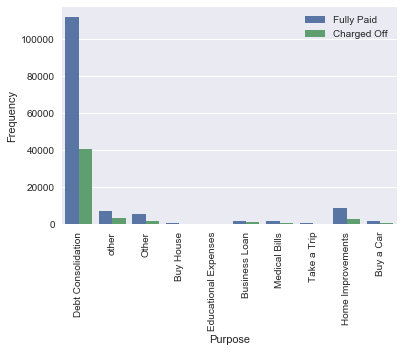

In [60]:
ax=sns.countplot(data=strat_train_set, x='Purpose', hue='Loan Status')
plt.xticks(rotation=90)
plt.legend(['Fully Paid', 'Charged Off'])
plt.ylabel('Frequency')